# Sloupcové grafy vykreslené funkcemi z projektu Incanter

Jedním z nejjednodušších typů grafů podporovaných systémem Incanter je sloupcový graf, který může být podle konkrétních požadavků orientován jak horizontálně, tak i vertikálně. Tento typ grafu se vytváří zavoláním makra pojmenovaného bar-chart, kterému je nutné předat minimálně dvě informace – sekvenci s popiskami hodnot na x-ové ose a sekvenci se samotnými hodnotami, které se mají do grafu vynést. Obě sekvence by přitom měly mít shodnou délku, což je systémem Incanter kontrolováno při konstrukci grafu. Podívejme se nyní na jednoduchý příklad. Spustíme interaktivní smyčku REPL, přepneme se do nového jmenného prostoru a nejprve provedeme všechny potřebné importy:

In [2]:
(ns simple-plot
  (:use (incanter core stats charts)))

Následně již můžeme nějakým způsobem vypočítat či načíst hodnoty, které se mají do grafu vynést. Pro jednoduchost se bude jednat o výsledky hodů kostkou, konkrétně o deset celočíselných hodnot od 1 do 6:

In [3]:
(def hody-kostkou (take 10 (repeatedly #(inc (rand-int 6)))))

#'simple-plot/hody-kostkou

Samotný sloupcový graf se následně vytvoří makrem bar-chart a vykreslí funkcí view, s níž jsme se již seznámili v úvodním článku o projektu Incanter. Prvním parametrem do makra bar-chart předáváme sekvenci hodnot 1..10, která se vypíše na x-ovou osu, druhým parametrem jsou vynášené hodnoty:

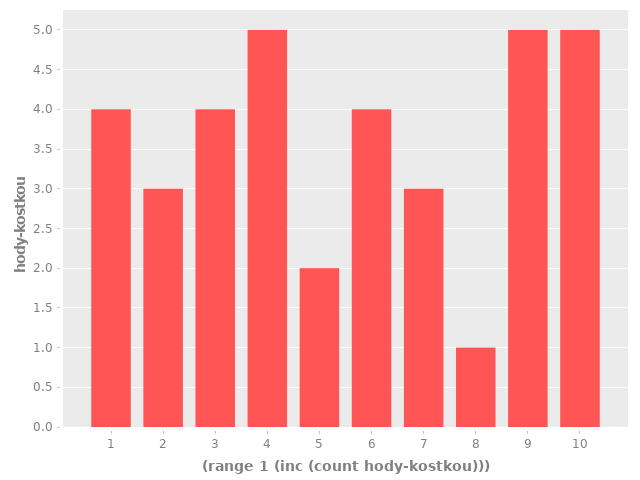

In [8]:
(->
    (bar-chart (range 1 (inc (count hody-kostkou)))
               hody-kostkou)
    (.createBufferedImage 640 480))

Při pohledu na předchozí screenshot jste si pravděpodobně všimli, že popisky os jsou automaticky získány z parametrů předaných makru bar-chart (ostatně právě proto se jedná o makro, aby nedošlo k vyhodnocení parametrů). Můžeme se ostatně jednoduše přesvědčit, co se stane ve chvíli, kdy změníme první parametr (který se ovšem vyhodnotí na tu samou sekvenci 1..10, jako tomu bylo v předchozím příkladu):

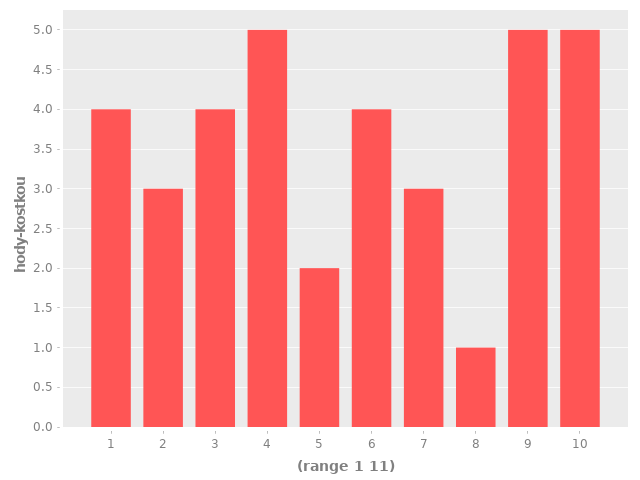

In [10]:
(->
    (bar-chart (range 1 11)
               hody-kostkou)
    (.createBufferedImage 640 480))

Ve skutečnosti se ovšem prakticky nikdy nespokojíme s výchozím automaticky generovaným popisem os a budeme muset vytvořit popisky vlastní. To se provede jednoduše – předáním nepovinných parametrů se jmény :x-label a y:label makru bar-chart:

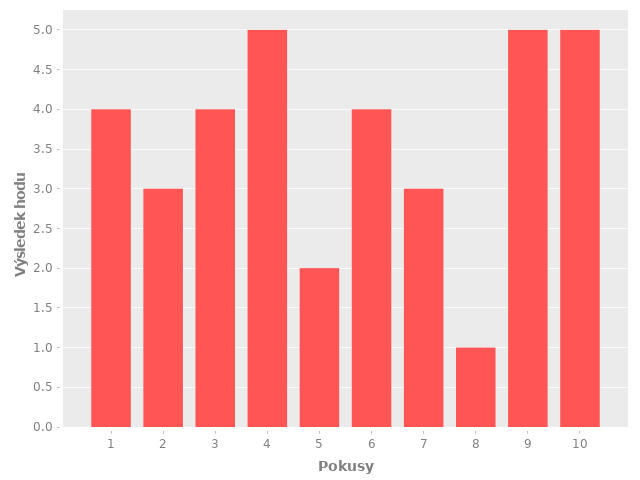

In [11]:
(->
    (bar-chart (range 1 (inc (count hody-kostkou)))
               hody-kostkou
               :x-label "Pokusy"
               :y-label "Výsledek hodu")
    (.createBufferedImage 640 480))